In [2]:
# if needed, handle install of sklearn using pip. This is necessary in python notebooks to account for differences in environments.
import sys
!{sys.executable} -m pip install sklearn
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install pandas

You should consider upgrading via the 'C:\Users\fgmni\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\fgmni\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\fgmni\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [3]:
# imports
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import NMF,TruncatedSVD
from sklearn.feature_extraction import text
import matplotlib.pyplot as plt
import pandas as pd
import re
# importing a `KMeans` library feels like skipping a bunch of steps but I think the goal of the assignment
# is to build my understanding of how the algorithm works in practice, as a function of the number
# of clusters, and not to spend a lot of time writing a bunch of lines to implement it.
from sklearn.cluster import KMeans


In [4]:
# newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers','footers'))
newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers','footers'), random_state=42, shuffle=True)

for i in range(len(newsgroups_train.data)):
    txt = re.sub(r'[^a-zA-Z]+', ' ', newsgroups_train.data[i])
    # get words from text
    words = txt.split()
    stop_words = text.ENGLISH_STOP_WORDS
    # remove stop words if they exist
    words = [word.lower() for word in words if word not in stop_words and len(word) > 2]
    # rejoin words, less any stop words
    newsgroups_train.data[i] = ' '.join(words)
print(newsgroups_train.target_names)

print(len(newsgroups_train.data))

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
11314


In [5]:
vectorizer = TfidfVectorizer(stop_words='english')
tfidf = vectorizer.fit_transform(newsgroups_train.data)

Dimension of TF-IDF features with min_df =  3  :  (11314, 78970)


In [6]:
k_means_output = KMeans(n_clusters=30, random_state=0).fit(tfidf)

In [7]:
numcom = 2

C:\Users\fgmni\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


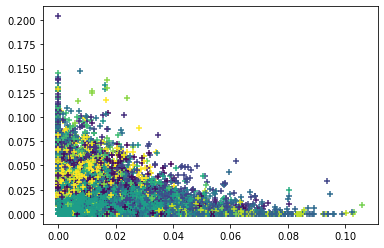

In [8]:
features = NMF(n_components=numcom).fit_transform(tfidf)
plt.scatter(features[:,0], features[:,1], c = k_means_output.labels_, marker='+')
plt.show()

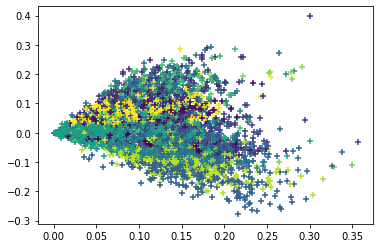

In [9]:
features = TruncatedSVD(n_components=numcom).fit_transform(tfidf)
plt.scatter(features[:,0], features[:,1], c = k_means_output.labels_, marker='+')
plt.show()

In [1]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(tfidf.toarray())
print('-'*20 + 'Explained variance ratio' + '-'*20)
print(pca.explained_variance_ratio_)
print('-'*20 + 'Singular value' + '-'*20)
print(pca.singular_values_)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\fgmni\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-1-387551033881>", line 5, in <module>
    pca.fit(tfidf.toarray())
NameError: name 'tfidf' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\fgmni\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py", line 2061, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\fgmni\AppData\Roaming\Python\Python39\site-packages\IPython\core\ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  Fil

TypeError: object of type 'NoneType' has no len()